# Keras Sequential API for Multi-class Classification

In this example notebook we are given the task of classifying images of handwritten digits using the MNIST dataset.

For doing multi-class classification we have an output neuron for each of the possible classes, representing the probability of the input belonging to that class.
The final predicted class is the one corresponding to the neuron which has the highest output value. 

We will build a neural network having 10 output neurons for each of the 10 digits.

<img src="assets/mnist_cnn.png"/>

Based on:
+ https://github.com/ADGEfficiency/teaching-monolith/blob/master/sequences/keras.ipynb
+ https://github.com/sempwn/keras-intro
+ https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py




Recap of the steps to build a model and get predictions with Keras:
1. Load Data
2. Define Keras Model
3. Compile Keras Model
4. Fit Keras Model.
5. Evaluate Keras Model
6. Make Predictions

In [1]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Loading in the MNIST dataset
[MNIST](http://yann.lecun.com/exdb/mnist/) is a classic machine learning dataset (Le Cun post office) known as the "hello world" of classification problems.

It consists of 70,000 28x28 pixel grayscale images of handwritten numbers, manually classified into the 10 digits, and split into a canonical training set and test set. 

In [2]:
# input image dimensions
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('%d train samples, %d test samples'% (X_train.shape[0], X_test.shape[0]))
print("training data shape: ", X_train.shape, Y_train.shape)
print("test data shape: ", X_test.shape, Y_test.shape)

60000 train samples, 10000 test samples
training data shape:  (60000, 28, 28) (60000,)
test data shape:  (10000, 28, 28) (10000,)


8


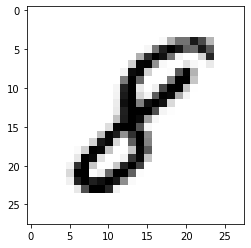

In [3]:
# check one random data point
idx = 7777
print(Y_train[idx])
plt.imshow(X_train[idx], cmap='Greys');

We need to pre-process the data for Keras:
1. Ensure they are float32 for precision;
+ Normalize the pixel values (which are naturally between 0 and 255) so that they are all between 0 and 1 instead;
+ Flatten the image arrays from $n$x28x28 to $n$x784, so each row of the data is the full "unrolled" list of pixels;
+ Convert class vectors to binary class matrices

In [13]:
X_train.dtype

dtype('uint8')

In [ ]:
# Ensure they are float32 for precision and normalize 
x_train = X_train.astype() / 
x_test = X_test.astype() /

In [4]:
X_train.shape

(60000, 28, 28)

In [ ]:
# Flatten the image arrays 
x_train = x_train.reshape()
x_test = x_test.reshape()

input_shape = # should be 28 * 28 = 784
x_train.shape # should be n = 60000, 784

In [ ]:
# Convert class vectors to binary class matrices
num_classes = len(set(Y_train))
print(num_classes)

y_train = keras.utils.to_categorical()
y_test = keras.utils.to_categorical()
y_train[idx] # check the example number 8

## Defining the model 

Add layers accordingly. 
The first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape, specified with the __input_dim__ parameter.

+ How do we know the number of layers and their types?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem.

In [ ]:
# Create multilayer neural network with more hidden layers.
model = 

# We'll give it two layers of 100 neurons each, with sigmoid activations. 
model.add()
model.add()

# Then we will make the output layer go through a softmax activation, the standard for classification.
model.add()

## Compiling the model
Before training a model, you need to configure the learning process, which is done via the  `compile`  method. 

We should also check we've constructed layer by layer: layer order,  output shape of each layer and the  parameters.

In [ ]:
model.compile()

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


## Fitting the model

The training process will run for a fixed number of iterations through of the rows in the dataset, that we must specify using the __epochs__ argument.

We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the __batch_size__ argument.

In [ ]:
batch_size = 
epochs = 

model.fit()

## Evaluating the model

In [ ]:
model.evaluate()

## Making predictions
Let's take a random digit example to find out how confident the model is at classifying the correct category

By calling the __predict_proba()__ function, we will get the probability of the data instance belonging to each class.


In the case of a multi-class classification problem like our example here, the softmax activation function is often used on the output layer and the likelihood of the observation for each class is returned as a vector.

In [ ]:
probs = 

* Choosing a random data from test set and show probabilities for each class.

In [ ]:
i = np.random.randint(0,len(X_test))
digit = X_test[i]

plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title('Example of digit: {}'.format(y_test[i]));
plt.imshow(digit, cmap='gray');
plt.axis('off');


plt.subplot(1,2,2);
plt.title('Probabilities for each digit class');
plt.bar(np.arange(10), probs[i], align='center'); 
plt.xticks(np.arange(10),np.arange(10).astype(str));

## Wrong predictions

Let's look more closely at the predictions on the test data that weren't correct, using the __predict_classes()__ function:

In [ ]:
predictions = model.predict_classes(x_test, batch_size=32, verbose=1)

In [ ]:
inds = np.arange(len(predictions))
wrong_results = inds[Y_test!=predictions]
len(wrong_results)

+ Choosing a random wrong result from the test set

In [ ]:
i = np.random.choice(wrong_results, size=1)[0]
digit = X_test[i]

plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title('Example of digit: {}'.format(y_test[i]));
plt.imshow(digit, cmap='gray');
plt.axis('off');


plt.subplot(1,2,2);
plt.title('Probabilities for each digit class');
plt.bar(np.arange(10), probs[i], align='center'); 
plt.xticks(np.arange(10),np.arange(10).astype(str));

+ Plot histogram comparing wrong and correct classifications

In [ ]:
wrong_probs = np.array([probs[ind][digit] for ind,digit in zip(wrong_results, predictions[wrong_results])])
all_probs =  np.array([probs[ind][digit] for ind,digit in zip(np.arange(len(predictions)),predictions)])

plt.figure(figsize=(6,6));
plt.hist(wrong_probs, alpha=0.5, density=True, label='wrongly-labeled');
plt.hist(all_probs, alpha=0.5, density=True, label='all labels');
plt.legend();
plt.title('Comparison between wrongly and correctly classified labels');
plt.xlabel('highest probability');

The current record for MNIST has 99.8% accuracy... So how can you achieve it? 

Convolutional neural networks have thus far proven to be the best at __computer vision tasks__.
